Linear Regression score 0.7830612410345841
Random Forest score 0.7668378128508876
Gradient Boosting score 0.7743753361314737


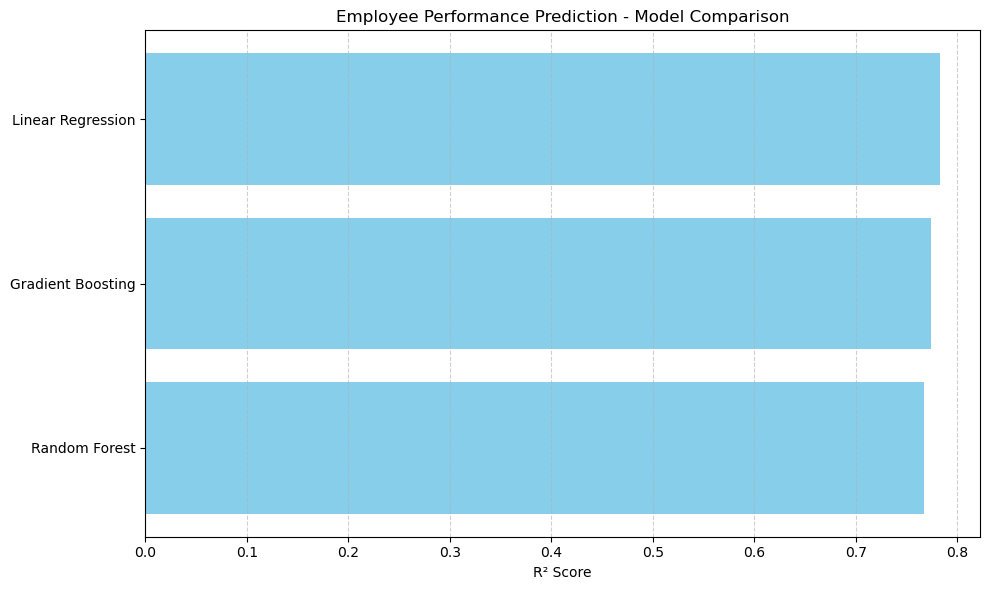

In [4]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Step 2: Load the dataset (replace with your file path if needed)
df = pd.read_csv("dataa.csv")  # or "train_dataset.csv"

# Step 3: Remove duplicate columns (fixes department_finishing repeated twice)
df = df.loc[:, ~df.columns.duplicated()]

# Step 4: Drop rows with missing values (especially 'wip')
df_cleaned = df.dropna()

# Step 5: Define features and target
X = df_cleaned.drop("actual_productivity", axis=1)
y = df_cleaned["actual_productivity"]

# Step 6: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    
}

# Step 8: Evaluate each model and store results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = r2_score(y_test, predictions)
    print(name,"score", score)
    results.append((name, score))

# Step 9: Create a DataFrame of results and sort
results_df = pd.DataFrame(results, columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=True)

# Step 10: Plot the comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["R2 Score"], color='skyblue')
plt.xlabel("R² Score")
plt.title("Employee Performance Prediction - Model Comparison")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 1: Load and clean dataset
df = pd.read_csv("dataa.csv")
df = df.loc[:, ~df.columns.duplicated()]
df = df.dropna()

# Step 2: Prepare features and target
X = df.drop("actual_productivity", axis=1)
y = df["actual_productivity"]

# Step 3: Train Random Forest (best model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Step 4: Get feature names
feature_names = X.columns.tolist()

# Step 5: Prediction function
def predict_employee_performance(*args):
    input_data = np.array(args).reshape(1, -1)
    prediction = rf.predict(input_data)[0]
    return f"Predicted Productivity: {prediction:.2f}"

# Step 6: Create dynamic Gradio inputs
input_components = []
for col in feature_names:
    if df[col].dtype == 'object':
        choices = df[col].unique().tolist()
        input_components.append(gr.Dropdown(choices=choices, label=col))
    else:
        input_components.append(gr.Number(label=col))

# Step 7: Gradio interface
demo = gr.Interface(
    fn=predict_employee_performance,
    inputs=input_components,
    outputs=gr.Textbox(label="Predicted Actual Productivity"),
    title="Employee Productivity Predictor",
    description="Enter employee details to predict their actual productivity using a trained Random Forest model."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7868
* To create a public link, set `share=True` in `launch()`.


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
